# Bluff Detector using Random Forest Regression

Motive : 

Business scenario: Human Resources team is about to hire a new employee in the company. During the salary negotiation process,
a potential employee candidate tells he has 20+ years of experience (it corresponds to the level 6.5 in the given dataset) and 
earned 160,000 annual salary in his previous company. Therefore, he is asking now for at least more than 160,000. One of the
HRs decides to check this info. To do this he has the only data set about ten different positions and salaries in the candidate’s
previous company. You, as a data scientist helping HR, have to build a regression model and to predict if this new candidate employee
is bluffing about his salary or not. 


# Import Libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import dataset

In [28]:
df=pd.read_csv('E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Class 3/Pos_Sal.csv')

In [29]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Null Values in data

In [30]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [32]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# Segregating data into dependent and independent variables

In [33]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# EDA of dataset

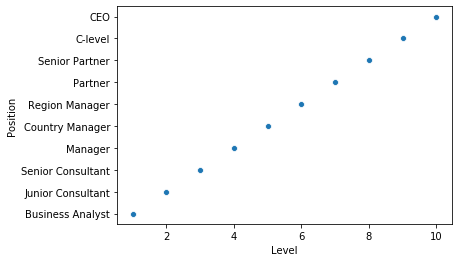

In [34]:
sns.scatterplot(x='Level', y='Position',data=df)

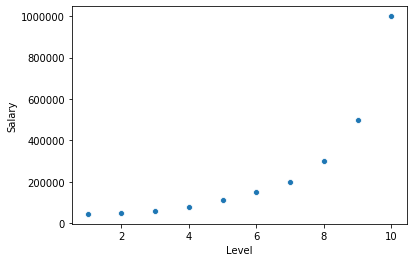

In [35]:
sns.scatterplot(y="Salary", x="Level",data=df)

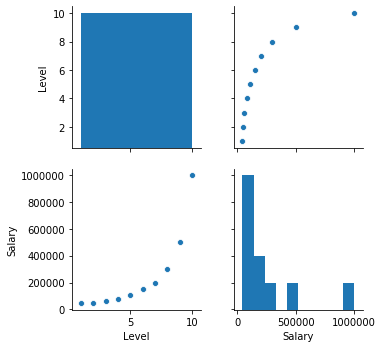

In [36]:
import seaborn as sns
sns.pairplot(df)

# Training the Random Forest model on the whole dataset

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# Visualising the Random Forest Regressor results

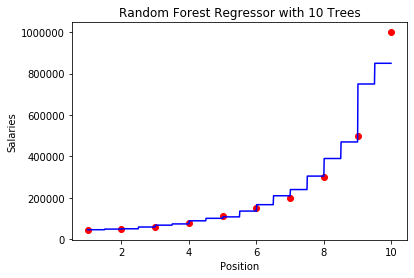

In [38]:
import matplotlib.pyplot as plt
import numpy as np
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Random Forest Regressor with 10 Trees")
plt.xlabel("Position")
plt.ylabel("Salaries")
plt.show() 

# Predicting a new result with Random Forest Regressor with 10 Trees

In [39]:
y_pred = regressor.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level is ',y_pred)

The predicted salary of a person at 6.5 Level is  [167000.]


# Random Forest Regressor : Increase number of tree’s to 100

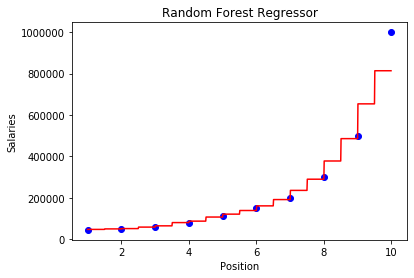

Random Forest Regressor with 50 trees:
The predicted salary of a person at 6.5 Level is [161200.] : 


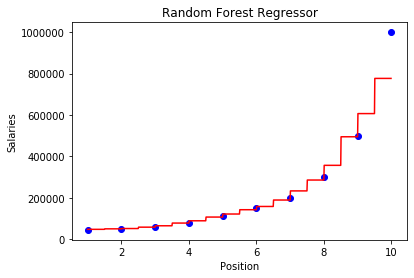

Random Forest Regressor with 100 trees:
The predicted salary of a person at 6.5 Level is [158300.] : 


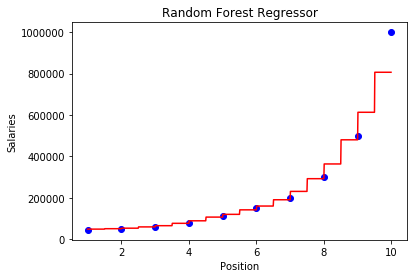

Random Forest Regressor with 300 trees:
The predicted salary of a person at 6.5 Level is [160333.33333333] : 


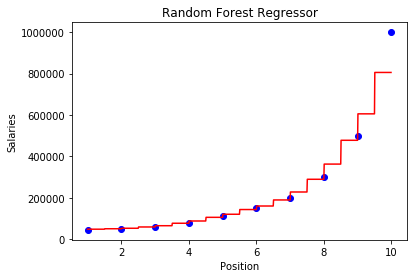

Random Forest Regressor with 400 trees:
The predicted salary of a person at 6.5 Level is [160500.] : 


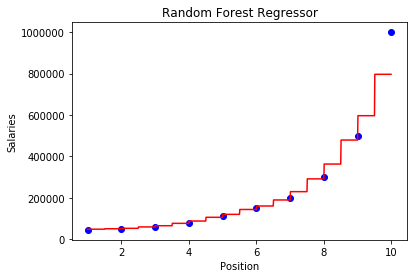

Random Forest Regressor with 500 trees:
The predicted salary of a person at 6.5 Level is [160600.] : 


In [40]:
n_est = [ 50, 100, 300, 400,500]
for x in n_est:
    regressor = RandomForestRegressor(n_estimators= x, random_state=0)
    regressor.fit(X, y)
    
    import numpy as np
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    plt.scatter(X, y, color="blue")
    plt.plot(X_grid, regressor.predict(X_grid), color="red")
    plt.title("Random Forest Regressor")
    plt.xlabel("Position")
    plt.ylabel("Salaries")
    plt.show()

    y_pred = regressor.predict([[6.5]])
    print("Random Forest Regressor with {} trees:".format(x))
    print("The predicted salary of a person at 6.5 Level is {} : ".format(y_pred))

# Conclusion

In a company during the salary negotiation process,a potential employee candidate tells he has 20+ years of experience 
(it corresponds to the level 6.5 in the given dataset) and earned 160,000 annual salary in his previous company. 
Therefore,I decided to build (bluff detector)a regression model using Random Forest Resgressotion and to predict salary
Here are some prediction based on different -2 hyperparameters :
    
    
--> The predicted salary of a person at 6.5 Level is [167000.] when Random Forest Regressor with 10 trees. 

-->The predicted salary of a person at 6.5 Level is  [161200.] when Random Forest Regressor with 50 trees. 

-->The predicted salary of a person at 6.5 Level is [158300.] when Random Forest Regressor with 100 trees.

-->The predicted salary of a person at 6.5 Level is [160333.33333333] when Random Forest Regressor with 300 trees.

-->The predicted salary of a person at 6.5 Level is [160500.] when Random Forest Regressor with 400 trees

-->The predicted salary of a person at 6.5 Level is [160600.] when Random Forest Regressor with 500 trees
    
   
As we can see when we will increase no. of trees more we''ll get perfect value for prediction.